
**1. Dataset Loading**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/My Drive/Multi_View_Classification/Feature_Extraction_code_After_Modification

/content/drive/My Drive/Multi_View_Classification/Feature_Extraction_code_After_Modification


In [3]:
cd Data_Final_Version/

/content/drive/My Drive/Multi_View_Classification/Feature_Extraction_code_After_Modification/Data_Final_Version


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from math import floor

In [5]:
data = pd.read_excel('review_final_version.xlsx')

In [6]:
data.columns

Index(['Unnamed: 0', 'RD(r)', 'EXT(r)', 'ETF(r)', 'TRR(r)', 'BRR(r)', 'ERD(r)',
       'RL(r)', 'Rank(r)', 'RFPP(r)', 'RSPP(r)', 'RFTAPP(r)', 'RSAPP(r)',
       'RSW(r)', 'ROW(r)', 'RInW(r)', 'RImW(r)', 'RPW(r)', 'RNW(r)',
       'Reviewer_id_from_ReviewContent_Sortedby_Product_wise',
       'Product_id_from_ReviewContent_Sortedby_Product_wise',
       'Date_from_ReviewContent_Sortedby_Product_wise',
       'Text_from_ReviewContent_Sortedby_Product_wise',
       'Reviewer_id_fromMeta_sortby_productwise',
       'Product_id_fromMeta_sortby_productwise',
       'Rating_fromMeta_sortby_productwise', 'Label_from_meta_product_wise',
       'Date_fromMeta_sortby_productwise', 'Count (P)',
       'Label_Labels_for_reviews', 'Reviewer_id_from_Labels_for_reviews'],
      dtype='object')

In [7]:
data['Text_from_ReviewContent_Sortedby_Product_wise'].replace('', np.nan, inplace=True)
data.dropna(subset=['Text_from_ReviewContent_Sortedby_Product_wise'], inplace=True)


In [8]:
xData = data[['Text_from_ReviewContent_Sortedby_Product_wise']]
yData = data[['Label_Labels_for_reviews']]

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(xData, yData,train_size = 0.75, test_size=0.25)

In [10]:
ytrain = ytrain.replace(-1,0)
ytest  = ytest.replace(-1,0)

In [11]:
ytrain = ytrain.to_numpy()
ytest  = ytest.to_numpy()
xtrain = xtrain.to_numpy()
xtest  = xtest.to_numpy()

In [12]:
print('xtrain shape: {} \n'.format(xtrain.shape))
print('ytrain shape: {} \n'.format(ytrain.shape))
print('xtest  shape: {} \n'.format(xtest.shape))
print('ytest  shape: {} \n'.format(ytest.shape))

xtrain shape: (68178, 1) 

ytrain shape: (68178, 1) 

xtest  shape: (22727, 1) 

ytest  shape: (22727, 1) 




**2. Get text Empeddings:**

In [13]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [14]:
xtrain = xtrain.reshape(1,-1)
xtrain.shape

(1, 68178)

In [15]:
n_splits = 6
n = floor(len(xtrain[0])/n_splits)
x = []
for i in range(n_splits):
  x.extend(embed(xtrain[0][i*n:(i+1)*n]))

In [ ]:
empedded_xtrain = np.array(x)

In [ ]:
!pip install yellowbrick

In [ ]:
ylabel = ytrain.flatten()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


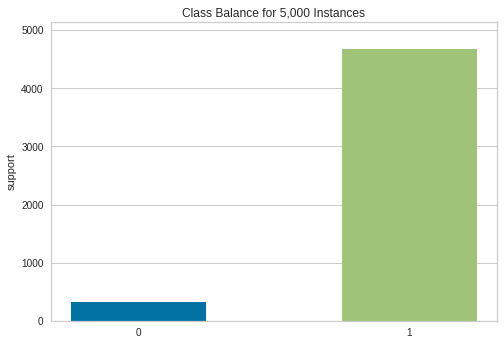

In [ ]:
from yellowbrick.target import class_balance

# Use the quick method and immediately show the figure
class_balance(ylabel)


**3. Dense Deep Learning Model:**

In [ ]:
from keras.models import Sequential

from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=512, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(empedded_xtrain, ytrain, epochs=150, batch_size=10)

# evaluate the keras model
_, accuracy = model.evaluate(empedded_xtrain, ytrain)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
500/500 [==============================] - 1s 1ms/step - loss: 0.2740 - accuracy: 0.9348
Epoch 2/150
500/500 [==============================] - 1s 1ms/step - loss: 0.2239 - accuracy: 0.9350
Epoch 3/150
500/500 [==============================] - 1s 1ms/step - loss: 0.2175 - accuracy: 0.9350
Epoch 4/150
500/500 [==============================] - 1s 1ms/step - loss: 0.2126 - accuracy: 0.9350
Epoch 5/150
500/500 [==============================] - 1s 1ms/step - loss: 0.2099 - accuracy: 0.9350
Epoch 6/150
500/500 [==============================] - 1s 1ms/step - loss: 0.2072 - accuracy: 0.9350
Epoch 7/150
500/500 [==============================] - 1s 1ms/step - loss: 0.2047 - accuracy: 0.9350
Epoch 8/150
500/500 [==============================] - 1s 1ms/step - loss: 0.2024 - accuracy: 0.9352
Epoch 9/150
500/500 [==============================] - 1s 1ms/step - loss: 0.1990 - accuracy: 0.9358
Epoch 10/150
500/500 [==============================] - 1s 1ms/step - loss: 0.1960 - accura

In [ ]:
xtest = xtest.reshape(1,-1)
empedded_xtest = embed(xtest[0])

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0','class 1']
y_pred = model.predict_classes(empedded_xtest)
print(classification_report(ytest, y_pred, target_names=target_names))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


              precision    recall  f1-score   support

     class 0       0.12      0.06      0.08       347
     class 1       0.93      0.96      0.95      4653

    accuracy                           0.90      5000
   macro avg       0.53      0.51      0.52      5000
weighted avg       0.88      0.90      0.89      5000




**4. CNN Deep Learning Model:**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

CNNmodel = Sequential()
CNNmodel.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(512,1)))
CNNmodel.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
CNNmodel.add(Dropout(0.5))
CNNmodel.add(MaxPooling1D(pool_size=2))
CNNmodel.add(Flatten())
CNNmodel.add(Dense(100, activation='relu'))
CNNmodel.add(Dense(1, activation='softmax'))

In [ ]:
empedded_xtrain = empedded_xtrain.numpy().reshape(num_train_samples,512,1)
empedded_xtest = empedded_xtest.numpy().reshape(num_test_samples,512,1)


In [ ]:
empedded_xtrain.shape

(5000, 512, 1)

In [ ]:
# compile the keras model
CNNmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
CNNmodel.fit(empedded_xtrain, ytrain, epochs=50, batch_size=10)

# evaluate the keras model
_, accuracy = CNNmodel.evaluate(empedded_xtrain, ytrain)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
500/500 [==============================] - 18s 35ms/step - loss: 0.9912 - accuracy: 0.9350
Epoch 2/50
500/500 [==============================] - 18s 35ms/step - loss: 0.9912 - accuracy: 0.9350
Epoch 3/50
500/500 [==============================] - 18s 35ms/step - loss: 0.9912 - accuracy: 0.9350
Epoch 4/50
500/500 [==============================] - 18s 36ms/step - loss: 0.9912 - accuracy: 0.9350
Epoch 5/50
500/500 [==============================] - 18s 35ms/step - loss: 0.9912 - accuracy: 0.9350
Epoch 6/50
500/500 [==============================] - 18s 35ms/step - loss: 0.9912 - accuracy: 0.9350
Epoch 7/50
500/500 [==============================] - 18s 35ms/step - loss: 0.9912 - accuracy: 0.9350
Epoch 8/50
500/500 [==============================] - 18s 36ms/step - loss: 0.9912 - accuracy: 0.9350
Epoch 9/50
500/500 [==============================] - 19s 37ms/step - loss: 0.9912 - accuracy: 0.9350
Epoch 10/50
500/500 [==============================] - 20s 40ms/step - loss: 0.991

In [ ]:
from sklearn.metrics import classification_report
y_pred = CNNmodel.predict_classes(empedded_xtest)
print(classification_report(ytest, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       347
     class 1       0.93      1.00      0.96      4653

    accuracy                           0.93      5000
   macro avg       0.47      0.50      0.48      5000
weighted avg       0.87      0.93      0.90      5000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



**5. LogisticRegression Model:**

In [ ]:
empedded_xtrain = empedded_xtrain.reshape(num_train_samples,512)
empedded_xtest  = empedded_xtest.reshape(num_test_samples,512)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9306

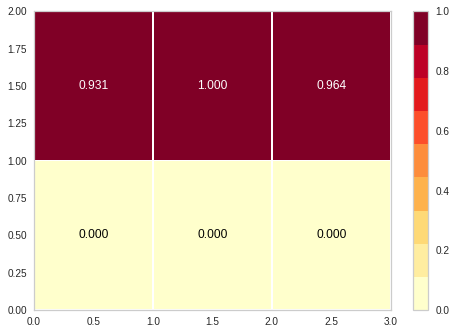

In [ ]:
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
viz = ClassificationReport(LogisticRegression())
viz.fit(empedded_xtrain, ytrain)
viz.score(empedded_xtest, ytest)